In [6]:
#%%
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, losses



In [7]:
# print(tf.__version__)


# 在线下载汽车效能数据集
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

# 效能（公里数每加仑），气缸数，排量，马力，重量
# 加速度，型号年份，产地
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
# 查看部分数据
dataset.tail()
dataset.head()
dataset
#%%

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [8]:
# 统计空白数据,并清除
dataset.isna().sum()
dataset = dataset.dropna()
dataset.isna().sum()
dataset
#%%


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [9]:

# 处理类别型数据，其中origin列代表了类别1,2,3,分布代表产地：美国、欧洲、日本
# 其弹出这一列
origin = dataset.pop('Origin')
# 根据origin列来写入新列
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0

dataset.tail()
dataset.head()
dataset

C:\Users\Johnson\AppData\Local\Continuum\anaconda3\envs\tf23\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Johnson\AppData\Local\Continuum\anaconda3\envs\tf23\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Johnson\AppData\Local\Continuum\anaconda3\envs\tf23\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0


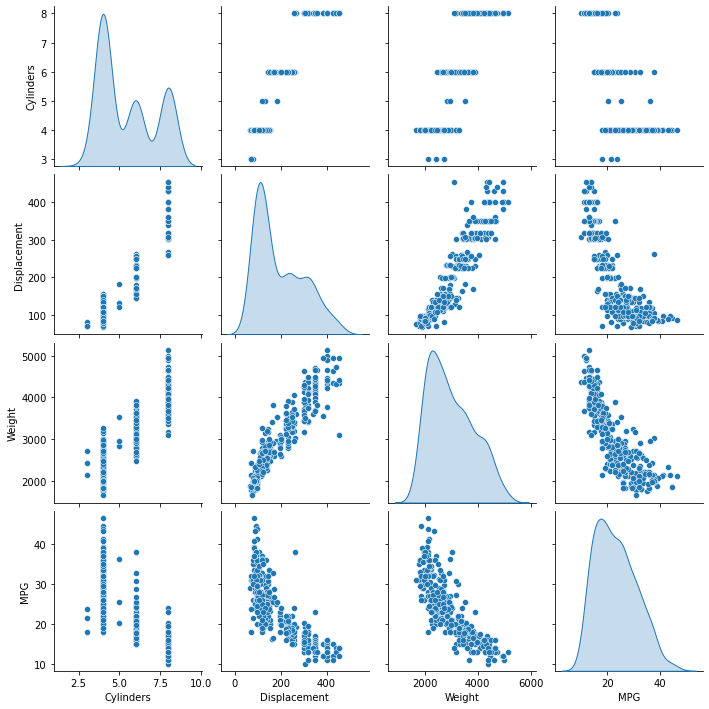

In [10]:
# 切分为训练集和测试集
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index) 


#%% 统计数据
sns.pairplot(train_dataset[["Cylinders", "Displacement", "Weight", "MPG"]], 
diag_kind="kde")
#%%


In [11]:
# 查看训练集的输入X的统计数据
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats


,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [12]:
# 移动MPG油耗效能这一列为真实标签Y
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')


# 标准化数据
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
#%%

print(normed_train_data.shape,train_labels.shape)
print(normed_test_data.shape, test_labels.shape)
#%%

(314, 9) (314,)
(78, 9) (78,)


In [13]:
class Network(keras.Model):
    # 回归网络
    def __init__(self):
        super(Network, self).__init__()
        # 创建3个全连接层
        self.fc1 = layers.Dense(64, activation='relu')
        self.fc2 = layers.Dense(64, activation='relu')
        self.fc3 = layers.Dense(1)

    def call(self, inputs, training=None, mask=None):
        # 依次通过3个全连接层
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)

        return x

model = Network()
model.build(input_shape=(None, 9))
model.summary()
optimizer = tf.keras.optimizers.RMSprop(0.001)
train_db = tf.data.Dataset.from_tensor_slices((normed_train_data.values, train_labels.values))
train_db = train_db.shuffle(100).batch(32)

Model: "network_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  640       
_________________________________________________________________
dense_4 (Dense)              multiple                  4160      
_________________________________________________________________
dense_5 (Dense)              multiple                  65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 未训练时测试
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result


# train_mae_losses = []
# test_mae_losses = []
# for epoch in range(200):
#     for step, (x,y) in enumerate(train_db):

#         with tf.GradientTape() as tape:
#             out = model(x)
#             loss = tf.reduce_mean(losses.MSE(y, out))
#             mae_loss = tf.reduce_mean(losses.MAE(y, out)) 

#         if step % 10 == 0:
#             print(epoch, step, float(loss))

#         grads = tape.gradient(loss, model.trainable_variables)
#         optimizer.apply_gradients(zip(grads, model.trainable_variables))

#     train_mae_losses.append(float(mae_loss))
#     out = model(tf.constant(normed_test_data.values))
#     test_mae_losses.append(tf.reduce_mean(losses.MAE(test_labels, out)))


# plt.figure()
# plt.xlabel('Epoch')
# plt.ylabel('MAE')
# plt.plot(train_mae_losses,  label='Train')

# plt.plot(test_mae_losses, label='Test')
# plt.legend()
 
# # plt.ylim([0,10])
# plt.legend()
# plt.savefig('auto.svg')
# plt.show() 




#%%



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



InternalError:  Blas GEMM launch failed : a.shape=(10, 9), b.shape=(9, 64), m=10, n=64, k=9
	 [[node network_1/dense_3/MatMul (defined at <ipython-input-13-5e7ab78daf22>:12) ]] [Op:__inference_predict_function_275]

Errors may have originated from an input operation.
Input Source operations connected to node network_1/dense_3/MatMul:
 Cast (defined at <ipython-input-14-41438d7c9cca>:3)

Function call stack:
predict_function
